# Assignment: Preparing Data for Analysis (Modified Titanic)

![](https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/%20files/hw.png)

In [2]:
#Import the libraries
import numpy as np
import pandas as pd
import requests
from io import StringIO, BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

In [48]:
url = 'https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/hw/titanic_training_dataset_v2.csv'
response = requests.get(url)
response.raise_for_status()

df = pd.read_csv(StringIO(response.text))
# df = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/hw/titanic_training_dataset_v2.csv')

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     865 non-null    float64
 2   Pclass       828 non-null    float64
 3   Name         866 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        858 non-null    float64
 7   Parch        891 non-null    int64  
 8   Ticket       852 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     803 non-null    object 
dtypes: float64(5), int64(2), object(5)
memory usage: 83.7+ KB


# 1) Load data & review the data

<font color='blue'>Q1) What is the shape of this dataset? (rows & columns)</font>

In [51]:
df.shape

(891, 12)

# 2) Drop unqualified variables

*   Drop variables with missing > 50%
*   Drop categorical variables with flat values > 70% (variables with the same value in the same column)

<font color='blue'>Q2) How many columns do we have left?</font>




In [52]:
df.isnull().sum()

PassengerId      0
Survived        26
Pclass          63
Name            25
Sex              0
Age            177
SibSp           33
Parch            0
Ticket          39
Fare             0
Cabin          687
Embarked        88
dtype: int64

## Missing vals > 50%
- cabin

In [53]:
df.drop(columns=['Cabin'], inplace=True)
df.shape

(891, 11)

In [54]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                            Sex     Age   SibSp  Parch  Ticket             Fare    Embarked
1            0.0       3.0     Braund, Mr. Owen Harris                         male    22.0  1.0    0      A/5 21171          7.250   S           1
514          1.0       1.0     Rothschild, Mrs. Martin (Elizabeth L. Barrett)  female  54.0  1.0    0      PC 17603           59.400  C           1
531          1.0       2.0     Quick, Miss. Phyllis May                        female  2.0   1.0    1      26360              26.000  S           1
530          0.0       2.0     Hocking, Mr. Richard George                     male    23.0  2.0    1      29104              11.500  S           1
529          0.0       3.0     Salonen, Mr. Johan Werner                       male    39.0  0.0    0      3101296            7.925   S           1
                                                                                                                     

In [55]:
df['Age'].value_counts(normalize=True)

Age
24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
28.00    0.035014
           ...   
36.50    0.001401
55.50    0.001401
0.92     0.001401
23.50    0.001401
74.00    0.001401
Name: proportion, Length: 88, dtype: float64

In [56]:
df['Age'].value_counts(normalize=True).max()

np.float64(0.04201680672268908)

In [57]:
value_counts_per_col = df.select_dtypes(include='object').apply(lambda col: col.value_counts(normalize=True).max() > 0.7)
value_counts_per_col

Name        False
Sex         False
Ticket      False
Embarked     True
dtype: bool

In [58]:
value_counts_per_col = df.apply(lambda col: col.value_counts(normalize=True).max() > 0.7)
value_counts_per_col

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch           True
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [59]:
value_counts_per_col[value_counts_per_col].index

Index(['Parch', 'Embarked'], dtype='object')

In [60]:
df.drop(columns=value_counts_per_col[value_counts_per_col].index, inplace=True)

In [61]:
df.shape

(891, 9)

# 3) Remove all rows with missing target (the variable "Survived")

<font color='blue'>Q3) How many rows do we have left?</font>

In [62]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,A/5 21171,7.2500
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,PC 17599,71.2833
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,STON/O2. 3101282,7.9250
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,113803,53.1000
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2.0,"Montvila, Rev. Juozas",male,27.0,0.0,211536,13.0000
887,888,1.0,1.0,"Graham, Miss. Margaret Edith",female,19.0,0.0,112053,30.0000
888,889,0.0,3.0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1.0,W./C. 6607,23.4500
889,890,1.0,1.0,"Behr, Mr. Karl Howell",male,26.0,0.0,111369,30.0000


In [63]:
df.dropna(subset=['Survived'], inplace=True)
df.shape

(865, 9)

# 4) Handle outliers

For the variable “Fare”, replace outlier values with the boundary values


*   If value < (Q1 - 1.5IQR), relace with (Q1 - 1.5IQR)
*   If value > (Q3 + 1.5IQR), relace with (Q3 + 1.5IQR)

<font color='blue'>Q4) What is the mean of “Fare” after replacing the outliers (round 2 decimal points)?</font>



In [65]:
a = df.dropna(subset=['Fare'])
print(df.shape, a.shape)
print(df.Fare.mean())

(865, 9) (865, 9)
32.39239815028901


In [66]:
q75, q25 = np.percentile(df.Fare, [75 ,25])
iqr = q75 - q25
print(f'q75 = {q75}, q25 = {q25}, iqr = {iqr}')

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print("min = ", min)
print("max = ", max)

q75 = 31.0, q25 = 7.8958, iqr = 23.1042
min =  -26.7605
max =  65.6563


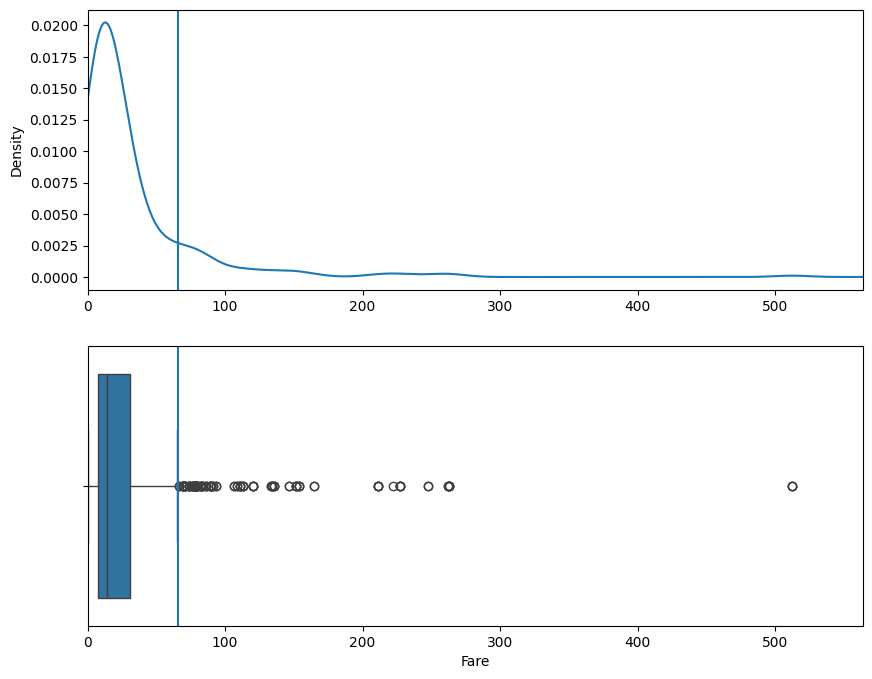

In [67]:
i = 'Fare'

plt.figure(figsize=(10,8))
plt.subplot(211) # 2 rows, 1 column, plot 1
plt.xlim(df[i].min(), df[i].max()*1.1)
plt.axvline(x=min)
plt.axvline(x=max)

ax = df[i].plot(kind='kde')

plt.subplot(212)
plt.xlim(df[i].min(), df[i].max()*1.1)
sns.boxplot(x=df[i])
plt.axvline(x=min)
plt.axvline(x=max)

In [68]:
kurtosis_before_value = kurtosis(df[i])
print("kurtosis_before_value = ", kurtosis_before_value) # less spread (+)
skew_before_value = skew(df[i])
print("skew_before_value = ", skew_before_value) # left skew (+)

kurtosis_before_value =  32.594269469273826
skew_before_value =  4.748677950431501


In [69]:
print(df.loc[df[i] < min, 'Fare'].shape)
print(df.loc[df[i] > max, 'Fare'].shape)

(0,)
(113,)


In [70]:
df.loc[df[i] < min, 'Fare'] = min
df.loc[df[i] > max, 'Fare'] = max
print(df.loc[df[i] < min, 'Fare'].shape)
print(df.loc[df[i] > max, 'Fare'].shape)

(0,)
(0,)


In [71]:
df[i].mean()

np.float64(24.038996878612718)

# 5) Impute missing value



*   Show the number of missing values in each variable
*   Impute missing values with mean & mode
*   Show the number of missing values again after missing value imputation

<font color='blue'>Q5) Which variable has the largest number of missing values?</font>



In [72]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
PassengerId      0
Survived         0
Pclass          63
Name            25
Sex              0
Age            172
SibSp           33
Ticket          39
Fare             0
dtype: int64


In [74]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [75]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
PassengerId     0
Survived        0
Pclass          0
Name           25
Sex             0
Age             0
SibSp           0
Ticket         39
Fare            0
dtype: int64


# 6) Convert categorical to numeric values



*   Drop the variables “Name” & “Ticket”
*   For the variables “Sex” & “Embarked”, perform the dummy coding and drop the first level. Also, drop those original variables (“Sex” & “Embarked”)

<font color='blue'>Q6) How many columns do we have?</font>



In [76]:
print(df.shape)
df.drop(columns=['Name', 'Ticket'], inplace=True)
print(df.shape)

(865, 9)
(865, 7)


In [83]:
nominal_columns = ["Sex"] # Embarked alreadt removed since >70% same value
dummy_df = pd.get_dummies(df[nominal_columns], drop_first=True)
df_with_dummy = pd.concat([df, dummy_df], axis=1)
df_with_dummy = df_with_dummy.drop(nominal_columns, axis=1)
print(dummy_df.shape, df_with_dummy.shape)

(865, 1) (865, 7)


In [81]:
dummy_df = pd.get_dummies(df[nominal_columns], drop_first=False)
dummy_df.head()

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [82]:
dummy_df = pd.get_dummies(df[nominal_columns], drop_first=True)
dummy_df.head()

,Sex_male
0,True
1,False
2,False
3,False
4,True


# 7) Partition data



*   Split train/test split with stratification using 70%:30% and random seed with 12345
*   Show a proportion between survived (1) and died (0) in all data sets (total data, train, test)

<font color='blue'>Q7) What is a proportion between survived (1) and died (0) in the training data?</font>



In [84]:
df_with_dummy

,PassengerId,Survived,Pclass,Age,SibSp,Fare,Sex_male
0,1,0.0,3.0,22.000000,1.0,7.2500,True
1,2,1.0,1.0,38.000000,1.0,65.6563,False
2,3,1.0,3.0,26.000000,0.0,7.9250,False
3,4,1.0,1.0,35.000000,1.0,53.1000,False
4,5,0.0,3.0,35.000000,0.0,8.0500,True
...,...,...,...,...,...,...,...
886,887,0.0,2.0,27.000000,0.0,13.0000,True
887,888,1.0,1.0,19.000000,0.0,30.0000,False
888,889,0.0,3.0,29.892266,1.0,23.4500,False
889,890,1.0,1.0,26.000000,0.0,30.0000,True


In [85]:
from sklearn.model_selection import train_test_split

df_2 = df_with_dummy.copy()
y = df_2.pop('Survived') # inplace operation
X = df_2

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=12345)

In [86]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(605, 6) (260, 6) (605,) (260,)


In [90]:
survived_train = y_train.sum() / y_train.shape[0]
survived_test = y_test.sum() / y_test.shape[0]
print("Survived in train: {:.2f}%".format(survived_train * 100))
print("Survived in test: {:.2f}%".format(survived_test * 100))

survived_all = y.sum() / y.shape[0]
print("Survived in all: {:.2f}%".format(survived_all * 100))

Survived in train: 38.35%
Survived in test: 38.46%
Survived in all: 38.38%


- use onehotencoder instead of get_dummies
- use imputer instead of fillna